# Olin's Coffee Cooling Problem #
#### By: Theo Johnson and Mary Fung

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Background
   Picture this, it's a Thursday evening and ModSim is just wrapping up. Before you leave, your teacher announces that the next class will start in the Nord where the teaching team will spend an hour introducing the next topic. By now, it's not uncommon for any of the first-year courses, such as DesNat or ModSim, to meet in the Nord before heading to the AC for time in the studios. If only it weren't so cold in the Nord.

   Last time this happened, you were already tired and low on energy when you got to the AC. Fortunately, you had made some coffee before heading to class. Unfortunately, the colder air in the Nord and the frigid weather outside have cooled your coffee more than you expected. This time however, you're more prepared.

## Question ##
   How warm should you make your coffee, knowing that you aren't going to drink it until you get to the AC and that you'll be in the Nord for an hour beforehand, and instead of making your coffee hotter, could you change the *k* value to get the same results?

## Method ##
Using the coffee cooling model in the Chapter 15 and 16 notebooks, we created our initial model with a set initial coffee temperature of 90 degrees Celsius, we'll sweep the initial temperature once we have a working model.

### Creating a Model ###
First things first, let's make our system.

Our system parameters include the initial temperature, the volume of coffee (in mL), the *k* value (for now let's assume 0.033), the environment temperatures (here's where it gets complicated), the ending time (in minutes), and the time step size (also in minutes).

Now, we also have to set the different temperatures for different times. Assuming you leave the Dining Hall 1 minute after making your coffee, walk outside for 1 minute before arriving in the Nord, stay in the Nord for an hour, walk outside for 1 minute to the AC, and take 5 minutes to settle down before drinking your coffee, the code looks like the following.

In [2]:
init = State(T=90) #all temps in in C
coffee = System(init=init,
                volume=200, #ml
                k=0.033,
                t_end=68,
                dt=1)
#Set values vol, k, time, step size

,values
init,T 90 dtype: int64
volume,200
k,0.033
t_end,68
dt,1


In [11]:
T_env = TimeSeries()
for t in range(0,1):
    """"Temperature in the Dining Hall was about 73 degrees F"""
    T_env[t] = 22.78

for t in range(1,2):
    """Temperature outside in the end of October was 53 degrees F on average"""
    T_env[t] = 11.67

for t in range(2,62):
    """Temperature in the Nord was about 68 degrees F"""
    T_env[t] = 20

for t in range(62,63):
    """Temperature outside"""
    T_env[t] = 11.67

for t in range(63,68):
    """Temperature in the AC was about 70 degrees F"""
    T_env[t] = 21.11
#
# set external temps in each time frame, timeframes in order:
# DH, outside, Nord, outside, AC
T_env[]

,values
0,22.78
1,11.67
2,20.00
3,20.00
4,20.00
5,20.00
6,20.00
7,20.00
8,20.00
9,20.00


Newton's Law of Cooling represents the differential equation of our stock-and-flow diagram, we'll store that in our update function.

In [5]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temperature in degrees Celsius)
    t: time in minutes
    system: System object
    
    returns: State (temperature)
    """
    unpack(system)
    
    T = state.T
    T += -k * (T - T_env[t]) * dt
    #Gets the temperature from State
    #Adds the change in temperature
    #Returns the new temperature to State
    return State(T=T)

#Differential equation from Newton's law of Cooling
#T=init temp, k=set value from cup, T_env = external temp, dt= step size

Let's see if it works:

In [6]:
update_func(init, 0, coffee)
#first step to test function

,values
T,87.78174


Now our run simulation function:

In [7]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame


To put it all together:

In [8]:
results = run_simulation(coffee, update_func)


,T
0,90
1,87.7817
2,85.2701
3,83.1161
4,81.0333
5,79.0192
6,77.0716
7,75.1882
8,73.367
9,71.6059


As a graph, it's easier to see the change in temperature that occurs.

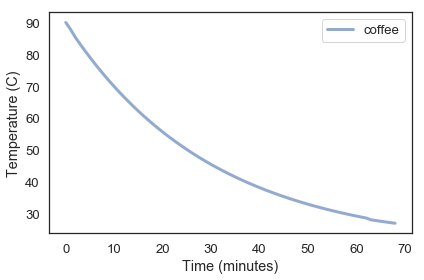

In [9]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')
#results of k value= .033 (Olin coffee cup)
#and T=90 (reccomended serving heat of coffee)

From here, we can collect the final temperature of the coffee.

In [10]:
coffee.T_final
#final temp of coffee with Olin values

27.065278177426602

## Results 1 ##
This is the skeleton of our model. As shown in the graph, the temperature of the coffee continuously decreases, nearing the temperature of the environment. It should be noted that no largely noticeable difference in the temperature drop based on the change in location can be seen. This is likely due to the fact that the temperature of the coffee is much greater than the surrounding environment, any change in rate is hard to see compared to the overall decrease in temperature.

However, as it stands, the final temperature of our coffee, is 28 degrees Celsius (78.8 degrees Fahrenheit). This is rather cold, so we will be attempting to raise the final temperature by changing both `T_init` and `k`.

### Cleaning up the code ###
Before we can move on, we should clean up our code. This will make it easier moving forward. To do this, we used a make system function to store our parameters.

In [ ]:
def make_system(T_init, k, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
    
    # T_final is used to store the final temperature.
    # Before the simulation runs, T_final = T_init
    T_final = T_init
    
    #T_env changes bsed on the location which corresponds to time
    for t in range(1):
        T_env[t] = 22.78


    for t in range(1,2):
        T_env[t] = 11.67


    for t in range(2,62):
        T_env[t] = 20


    for t in range(62,63):
        T_env[t] = 11.67


    for t in range(63,68):
        T_env[t] = 21.11
    dt = 1
                
    return System(locals())

Running the new code:

In [ ]:
coffee = make_system(T_init=90, k=0.033, volume=200, t_end=68)
results = run_simulation(coffee, update_func)
coffee.T_final

And we can make it easier to get the final temperature by adding another function. This will be necessary when we get to sweeping our parameters.

In [ ]:
def coffee_final(results):
 
    return get_last_value(results.T)

### Sweeping parameters ###
Now that we have our model, let's answer our question by sweeping for `T_init` and `k`.

#### Sweeping T_init 
To sweep our initial temperature, we'll loop an array into a function and return a SweepSeries object.

In [ ]:
T_array = linspace(60, 100, 9)

In [ ]:
def sweep_T(T_array, k):
    """Sweep a range of values for T_init.
    
    T_array: array of T_init values
    r: rate of heat transfer
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for T_init in T_array:
        coffee = make_system(T_init, k, volume, t_end)
        results = run_simulation(coffee, update_func)
        sweep[coffee.T_init] = coffee_final(results)
    return sweep

To test our results we can run our function and plot the results.

In [ ]:
init_Temp = sweep_T(T_array, k)

In [ ]:
label = 'k = ' + str(k)
plot(init_Temp, label=label)

decorate(xlabel='Initial Temperature (degrees Celsius)',
         ylabel='Final Temperature')

## Results 2 ##
As you can see, the higher the initial temperature, the higher the final temperature of the coffee. With a constant `k` value of 0.033, the highest possible initial temperature (since water boils at 100 degrees Celsius) still won't produce a high enough final temperature. Additionally, it is unfeasible to carry around extremely hot coffee, since the chance of spilling and burning yourself are high. Therefore, we should look at other ways to produce higher final temperatures.

#### Sweeping T_init and k
From here, we can sweep `k` and use a SweepFrame to store our results. By changing the rate of heat transfer, `k`, we can also attempt to end our simulation with a better final temperature.

In [ ]:
def sweep_parameters(T_array, k_array):
    """Sweep a range of values for T_init and k.
    
    T_array: array of initial temperatures
    k_array: array of heat transfer rates
    
    returns: SweepFrame with one row for each T_init
             and one column for each k
    """
    frame = SweepFrame(columns=k_array)
    for k in k_array:
        frame[k] = sweep_T(T_array, k)
    return frame

And the results:

In [ ]:
T_array = linspace(60, 100, 9)
k_array = linspace(0, .05, 6)
frame = sweep_parameters(T_array, k_array)
frame.head()
#two parameter sweep

In [ ]:
frame.tail()
#two parameter sweep

And to plot the results:

In [ ]:
for k in k_array:
    label = 'k = ' + str(k)
    plot(frame[k], label=label)
    
decorate(xlabel='Starting Temp. (C)',
         ylabel='Final Temp (C)',
         loc=1)
#plot of two parameter sweep

## Results 3##
Changing the rate of heat transfer has a huge impact on the final temperature, especially when used alongside different starting temperatures. Based on these results, we can see that lower `k` values have better effects on the final temperature of the coffee. Looking at the results, `k` values of 0.02 and lower can, at different initial temperatures result in final coffee temperatures that are more suitable for drinking.

## Interpretation ##
The temperature range that is suggested to be best for drinking coffee lies between 40 and 60 degrees Celsius (around 100 to 140 F), depending on each person's personal preference. The recommended serving temperature for coffee is between 70 and 85 degrees Celsius (around 160 to 185 F).

To meet this requirement with a coffee cup with a k value of 0.03, which was our original k value, the initial temperature has to be almost 100 degrees Celsius which is the boiling temperature of water. Not only is this unfeasible, but coffee that hot would be dangerous to carry around since it would be very easy to burn oneself.

Comparatively, having a cup with a k value of 0.01 allows for an initial temperature of 80 C or higher and produces a final temperature between 50 C and 60 C.

No model is perfect, and ours certainly had a fair amount of failings.

First of all, we had hoped to see a change in the cooling of the coffee based on the change in location. While a difference does exist, it is barely noticeable and all we can see is a general decrease in temperature over time. This short falling was able to be ignored in the larger scheme of things, since our question depended more on the eventual final temperature of the coffee after a significant decrease in temperature had occurred.

Another alteration we had to make to the model occurred when we began sweeping parameters. Originally, we had intended to only sweep for the initial temperature. This proved to be too simple of a model and didn't allow for the question to be answered based on the k value we originally had as a constant. To solve this, we added a second parameter sweep.

Throughout the project, iteration played an important role in our modeling process. We used a few different ways of writing the code, using some later iterations to condense it in a neater and less unwieldy form. We also used different iterations of our code to choose the best ranges for sweeping the initial temperature and k values so that the model wasn't cluttered with too much data and made sense.

## Abstract ##
In this project, we asked how warm should you make your coffee, knowing that you aren't going to drink it until you get to the AC and that you'll be in the Nord for an hour beforehand, and instead of making your coffee hotter, could you change the *k* value to get the same results?

We found that with an initial temperature of 70 degrees Celsius and a k value of 0.033, the coffee was too cold to drink after the set time period. The following graph shows the original loss in temperature before sweeping any parameters.

In [ ]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

When we swept the initial temperature, we found that the highest possible initial temperatures (100 C) didn't produce final temperatures that were warm enough. At an initial temperature of 100 C (boiling point of water) the final temperature is just over 29 C as shown in the graph below.

In [ ]:
label = 'k = ' + str(k)
plot(init_Temp, label=label)

decorate(xlabel='Initial Temperature (degrees Celsius)',
         ylabel='Final Temperature')

Our final parameter sweep, which swept both initial temperature and k value better answered our question. The following graph indicates our results.

In [ ]:
for k in k_array:
    label = 'k = ' + str(k)
    plot(frame[k], label=label)
    
decorate(xlabel='Starting Temp. (C)',
         ylabel='Final Temp (C)',
         loc=1)

As shown, to have a final coffee temperature that is warm enough to drink, a k value of 0.01 or less would be needed along with an initial temperature of at least 80 degrees Celsius.